In [19]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import call

In [20]:
# importing the dataset
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
titanic_df["Sex"].unique()
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,False,True


In [23]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
B28 = titanic_df[titanic_df['Cabin'] == 'B28']
B28

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
61,62,1,1,"Icard, Miss. Amelie",38.0,0,0,113572,80.0,B28,S,True,False
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",62.0,0,0,113572,80.0,B28,S,True,False


In [24]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,True,False,False,True


In [25]:
# Drop object columns
titanic_df.drop("Cabin", axis=1, inplace=True)
titanic_df.drop("Name", axis=1, inplace=True)
titanic_df.drop("Ticket", axis=1, inplace=True)

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_female   891 non-null    bool   
 8   Sex_male     891 non-null    bool   
 9   Embarked_C   891 non-null    bool   
 10  Embarked_Q   891 non-null    bool   
 11  Embarked_S   891 non-null    bool   
dtypes: bool(5), float64(2), int64(5)
memory usage: 53.2 KB


In [26]:
# Assign x and y variables
X = titanic_df[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = titanic_df['Survived']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Sex_female   891 non-null    bool   
 7   Sex_male     891 non-null    bool   
 8   Embarked_C   891 non-null    bool   
 9   Embarked_Q   891 non-null    bool   
 10  Embarked_S   891 non-null    bool   
dtypes: bool(5), float64(2), int64(4)
memory usage: 46.2 KB


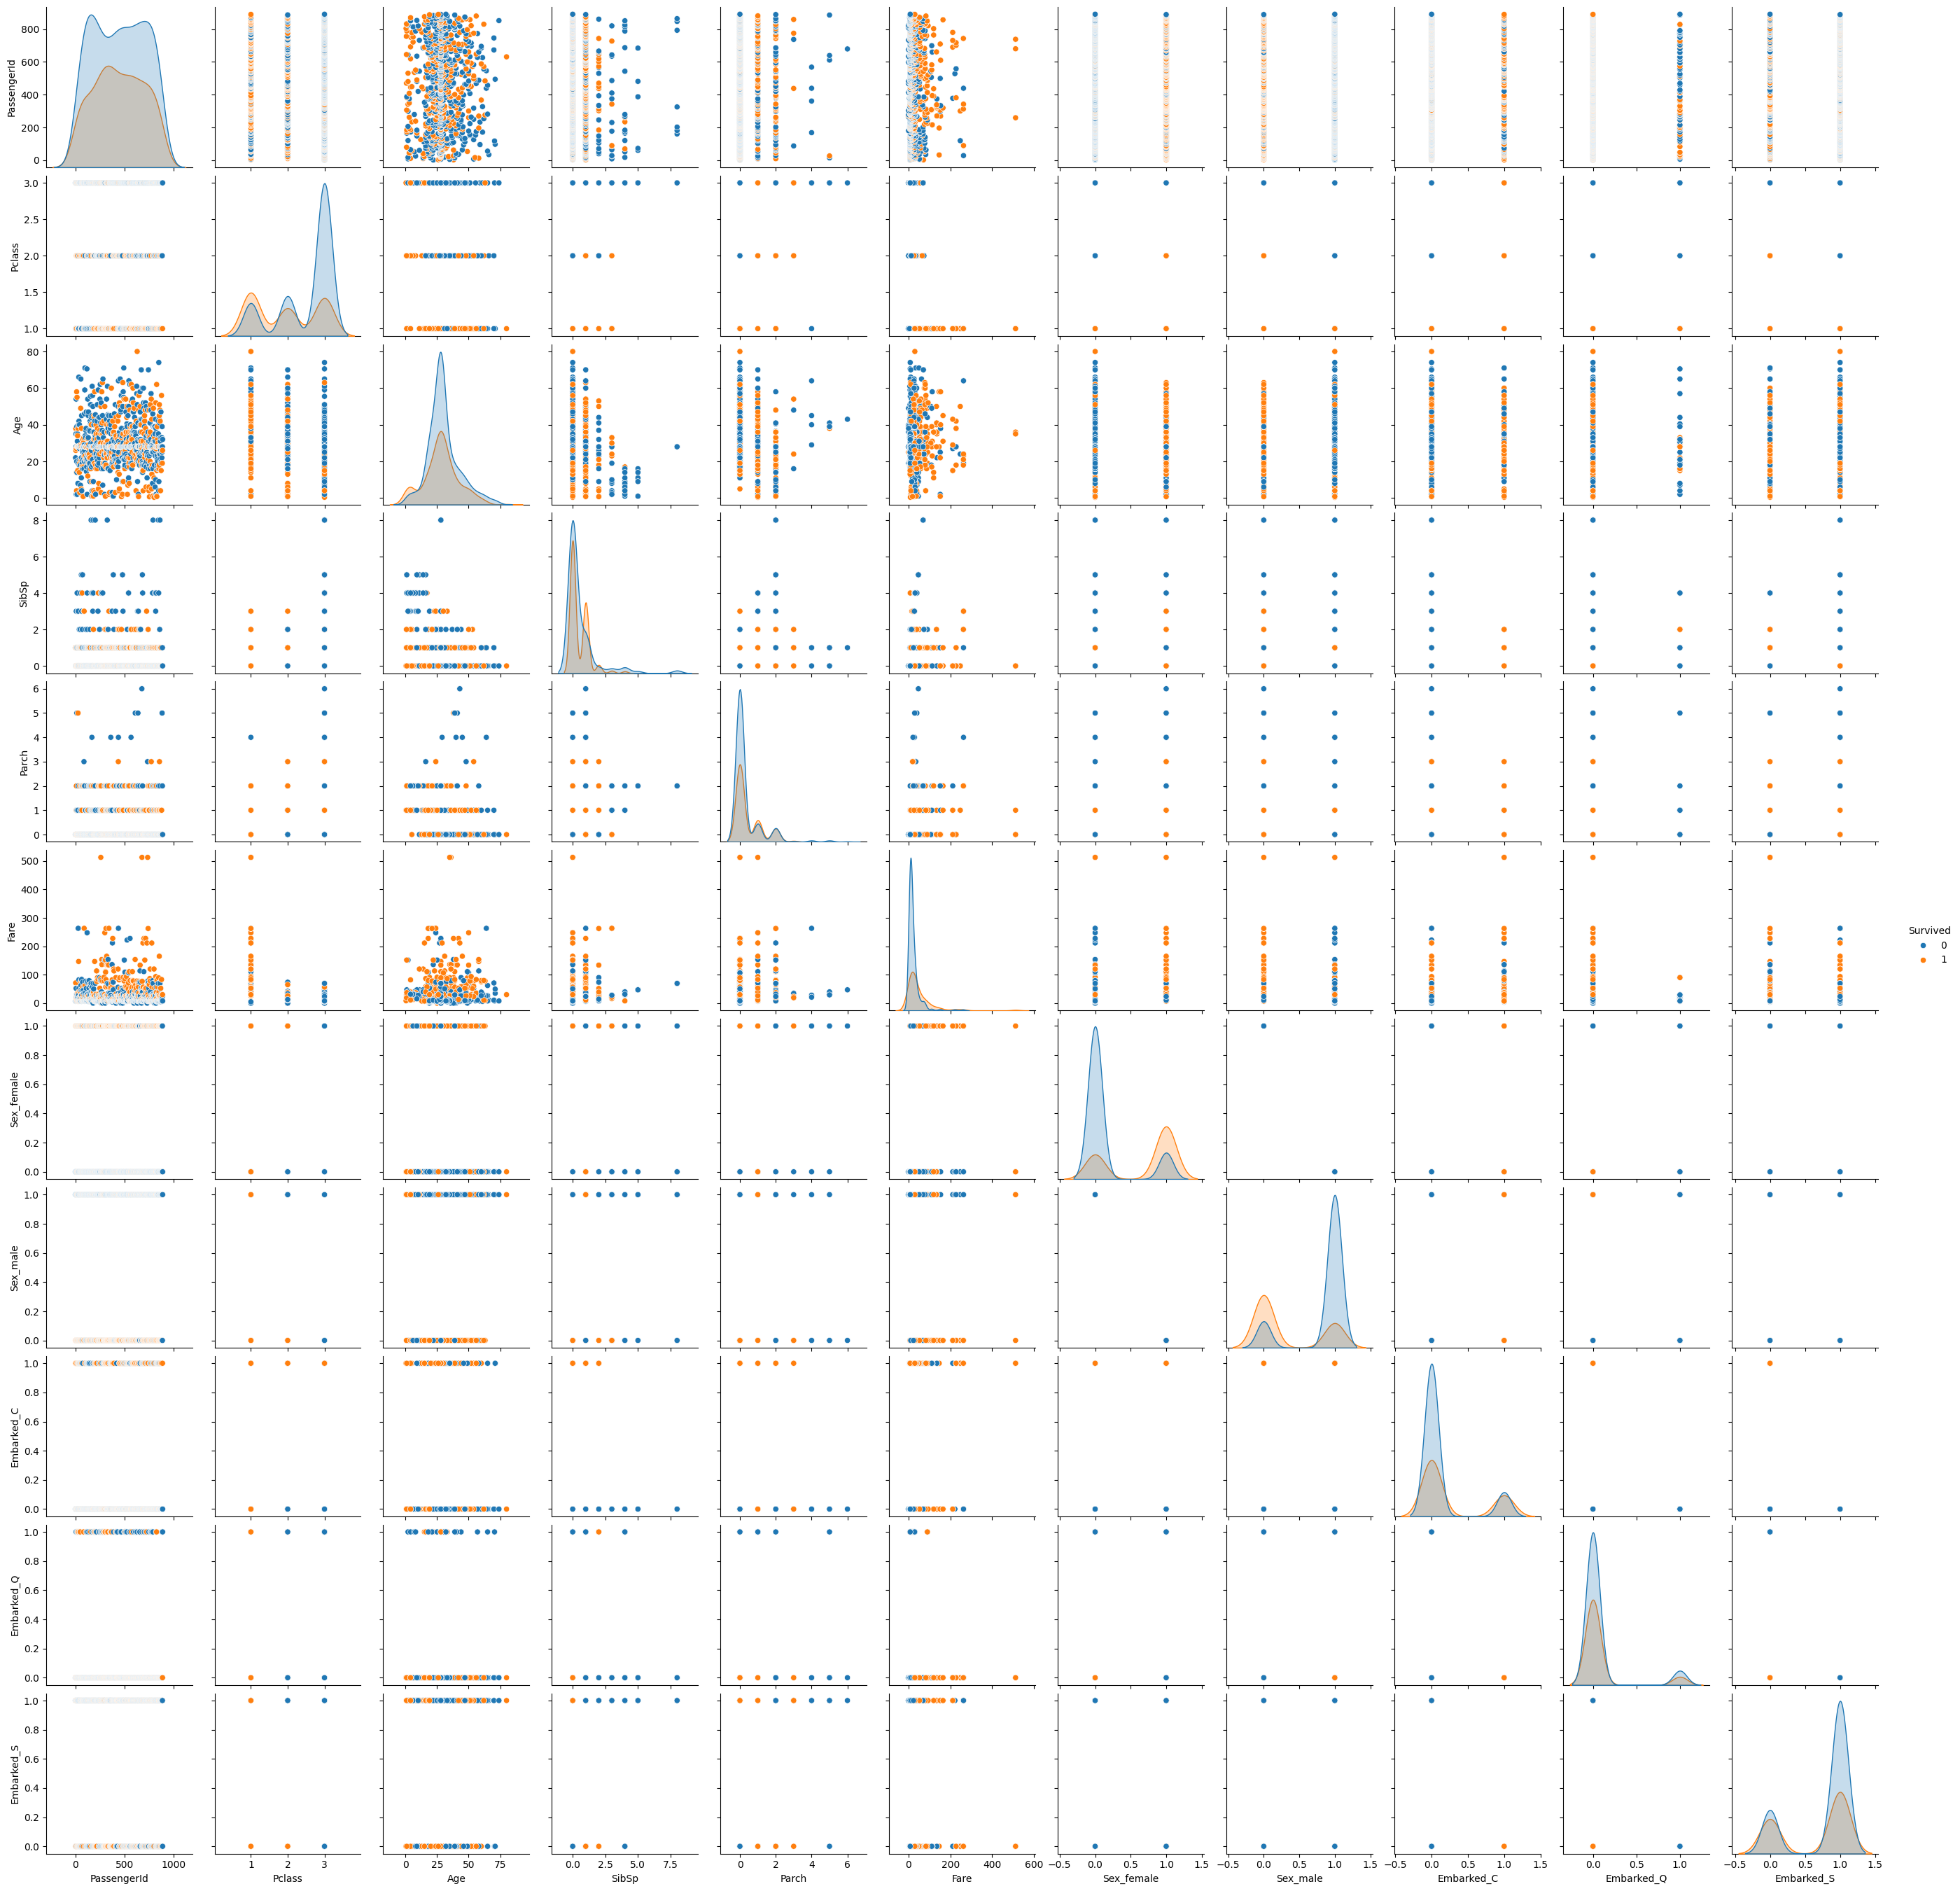

In [27]:
sns.pairplot(titanic_df, hue='Survived')

In [28]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
base = DecisionTreeClassifier(max_depth=3, random_state=42)
bagging = BaggingClassifier(estimator=base, n_estimators=100, random_state=42)

base.fit(X_train,y_train)
bagging.fit(X_train,y_train)

print(f"Accuracy base: {round(base.score(X_test, y_test), 4)}")
print(f"Accuracy bagging: {round(bagging.score(X_test, y_test), 4)}")

Accuracy base: 0.8097
Accuracy bagging: 0.8022


In [31]:
base = DecisionTreeClassifier(max_depth=3, random_state=42)
boost = AdaBoostClassifier(estimator=base, n_estimators=100, algorithm='SAMME', random_state=42)

boost.fit(X_train, y_train)

y_pred = boost.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy boost: {round(accuracy, 4)}")

c:\Users\shazz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Accuracy boost: 0.7985


In [32]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

feature_imp = pd.Series(forest.feature_importances_).sort_values(ascending=False)
feature_imp

5     0.192979
0     0.182577
2     0.164099
6     0.134529
7     0.131047
1     0.078225
3     0.041563
4     0.033866
8     0.016908
10    0.016267
9     0.007939
dtype: float64

**The most important features were selected (above 0.07):**  
- PassengerId
- Fare
- Age
- Sex_male
- Sex_female
- Pclass

In [33]:
feature_imp = pd.Series(forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)
important_features = feature_imp.head(6).index

X_train_features = X_train[important_features]
X_test_features = X_test[important_features]

forest_selected = RandomForestClassifier(n_estimators=100, random_state=42)
forest_selected.fit(X_train_features, y_train)

y_pred = forest_selected.predict(X_test_features)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with important features: {round(accuracy, 4)}")

Accuracy with important features: 0.8172


In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
test_param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_model, param_grid=test_param, cv=10, n_jobs=4)

grid_search.fit(X_train, y_train)

print("Best model:", grid_search.best_estimator_)
print(f"Best score: {round(grid_search.best_score_, 4)}")

Best model: RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)
Best score: 0.8282


# Accuracy Scores:
- Base (using max_depth of 3): 80.97%
- Bagging (using n_estimator of 100): 80.22%
- Boosting (using n_estimator of 100): 79.85%
- Random Forest (using n_estimator of 100 and top 6 most important features): 81.72%
- **Best Score (using Random Forest, max_depth of 5 and n_estimators of 200): 82.82%**